# 서울 공공 자전거 이용 현황 데이터 분석

<img src='https://raw.githubusercontent.com/Jangrae/img/master/seoul_bike.png' width="650" align="left">

**1) 한글 설정**

In [1]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

In [4]:
# 데이터 읽어오기

path = 'https://bit.ly/SeoulBikeFile'
bike = pd.read_csv(path,encoding='CP949')

## 2.데이터 탐색

**1) 상/하위 데이터 확인**

In [5]:
# 상위 5개 행 확인
bike.head(5)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-06,3,중랑센터,일일(회원),F,AGE_003,1,11.23,0.12,506.18,17
1,2021-06,3,중랑센터,정기,NaN,AGE_003,2,107.00,0.79,3377.56,17
2,2021-06,3,중랑센터,정기,M,AGE_002,6,352.15,3.18,13680.88,81
3,2021-06,3,중랑센터,정기,M,AGE_004,3,61.55,0.50,2158.72,21
4,2021-06,3,중랑센터,정기,M,AGE_005,3,125.30,1.10,4722.60,36


In [6]:
# 하위 5개 행 확인
bike.tail(5)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
119855,2021-06,88888,88888.영남배송,정기,F,AGE_002,1,0.00,0.00,0.00,9
119856,2021-06,88888,88888.영남배송,정기,M,AGE_002,2,218.93,1.97,8505.59,79
119857,2021-06,88888,88888.영남배송,정기,M,AGE_003,1,8.32,0.07,283.84,41
119858,2021-06,99997,도봉정비센터,일일(회원),M,AGE_005,1,NaN,NaN,0.00,4
119859,2021-06,99999,99999. 영남단말기정비,정기,NaN,AGE_008,6,0.00,0.00,0.00,235


**2) 열 데이터 형식, 값 개수**

In [9]:
# 열 정보 확인
bike.columns

Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)'],
      dtype='object')

**3) 기초통계정보 확인**


In [11]:
# 기초통계정보 
bike.describe()

,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,119860.000000,119860.000000,1.196980e+05,119698.000000,1.198600e+05,119860.000000
mean,1902.517437,28.870407,8.869655e+03,20.455260,8.805111e+04,749.706699
std,1453.116590,56.813723,1.335818e+06,42.948015,1.850256e+05,1504.361808
min,3.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,806.000000,3.000000,2.032625e+02,1.840000,7.870930e+03,76.000000
50%,1640.000000,9.000000,7.376450e+02,6.590000,2.830418e+04,255.000000
75%,2654.000000,30.000000,2.454695e+03,21.720000,9.339718e+04,812.000000
max,99999.000000,1617.000000,4.000089e+08,2376.180000,1.024219e+07,87111.000000


**4) 결측치 확인**

In [12]:
# 결측치 확인
bike.isna().sum()

대여일자           0
대여소번호          0
대여소명           0
대여구분코드         0
성별         52158
연령대코드          0
이용건수           0
운동량          162
탄소량          162
이동거리(M)        0
이용시간(분)        0
dtype: int64

**5) 범주형 데이터 확인**

- 대여구분코드

In [13]:
# 대여구분코드
bike['대여구분코드'].value_counts()

정기         60530
일일(회원)     45514
단체          8914
일일(비회원)     2804
10분이용권      2098
Name: 대여구분코드, dtype: int64

- 성별

In [14]:
# 성별
bike['성별'].value_counts()

M    35383
F    32290
m       19
f       10
Name: 성별, dtype: int64

- 연령대코드

In [15]:
# 연령대코드
bike['연령대코드'].value_counts()

AGE_002    21982
AGE_003    19610
AGE_008    19395
AGE_004    18575
AGE_001    14720
AGE_005    14555
AGE_006     8180
AGE_007     2843
Name: 연령대코드, dtype: int64

- 대여소명

In [16]:
# 대여소명
bike['대여소명'].value_counts()

502. 뚝섬유원지역 1번출구 앞    85
207. 여의나루역 1번출구 앞     85
152. 마포구민체육센터 앞       84
2715.마곡나루역 2번 출구      81
2622. 올림픽공원역 3번출구     79
                      ..
상암센터 정비실               2
4322.서울추모공원 입구         1
도봉정비센터                 1
99999. 영남단말기정비         1
천호센터                   1
Name: 대여소명, Length: 2471, dtype: int64

## 3.데이터 전처리

**1) 결측치 제거**

In [19]:
bike.dropna(subset=['운동량'], axis=0,inplace = True)

bike.head(5)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-06,3,중랑센터,일일(회원),F,AGE_003,1,11.23,0.12,506.18,17
1,2021-06,3,중랑센터,정기,NaN,AGE_003,2,107.00,0.79,3377.56,17
2,2021-06,3,중랑센터,정기,M,AGE_002,6,352.15,3.18,13680.88,81
3,2021-06,3,중랑센터,정기,M,AGE_004,3,61.55,0.50,2158.72,21
4,2021-06,3,중랑센터,정기,M,AGE_005,3,125.30,1.10,4722.60,36


In [20]:
bike.dropna(subset=['탄소량'], axis=0,inplace = True)

bike.head(5)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-06,3,중랑센터,일일(회원),F,AGE_003,1,11.23,0.12,506.18,17
1,2021-06,3,중랑센터,정기,NaN,AGE_003,2,107.00,0.79,3377.56,17
2,2021-06,3,중랑센터,정기,M,AGE_002,6,352.15,3.18,13680.88,81
3,2021-06,3,중랑센터,정기,M,AGE_004,3,61.55,0.50,2158.72,21
4,2021-06,3,중랑센터,정기,M,AGE_005,3,125.30,1.10,4722.60,36


**2) 결측치 채우기**

In [21]:
bike['성별'].fillna('X', inplace=True)

bike['성별'].value_counts()

X    52070
M    35348
F    32251
m       19
f       10
Name: 성별, dtype: int64

**3) 데이터 변경**

In [22]:
bike['성별'] = bike['성별'].map({'X':'X', 'M':'M', 'F':'F', 'f':'F','m':'M'})

In [23]:
bike['성별'].value_counts()

X    52070
M    35367
F    32261
Name: 성별, dtype: int64

In [24]:
bike['연령대코드'] = bike['연령대코드'].map({'AGE_001':'10대', 'AGE_002':'20대', 'AGE_003':'30대','AGE_004':'40대', 'AGE_005':'50대', 'AGE_006':'60대', 'AGE_007':'70대', 'AGE_008':'80대'})
bike['연령대코드'].value_counts()

20대    21962
30대    19589
80대    19373
40대    18549
10대    14697
50대    14526
60대     8166
70대     2836
Name: 연령대코드, dtype: int64

**4) 불필요한 열 제거**

In [27]:
bike.drop(['대여일자','대여소번호'],axis=1,inplace=True)

bike.head(5)

,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,중랑센터,일일(회원),F,30대,1,11.23,0.12,506.18,17
1,중랑센터,정기,X,30대,2,107.00,0.79,3377.56,17
2,중랑센터,정기,M,20대,6,352.15,3.18,13680.88,81
3,중랑센터,정기,M,40대,3,61.55,0.50,2158.72,21
4,중랑센터,정기,M,50대,3,125.30,1.10,4722.60,36


**5) 열 이름 변경**

    - 대여소명 --> 대여소
    - 대여구분코드 --> 대여구분
    - 연령대코드  --> 연령대
    - 이동거리(M) --> 이동거리
    - 이용시간(분) --> 이용시간

In [28]:
bike.rename(columns={'대여소명':'대여소', '대여구분코드':'대여구분', '연령대코드':'연령대', '이동거리(M)':'이동거리', '이용시간(분)':'이용시간'}, inplace=True)
bike.head(5)

,대여소,대여구분,성별,연령대,이용건수,운동량,탄소량,이동거리,이용시간
0,중랑센터,일일(회원),F,30대,1,11.23,0.12,506.18,17
1,중랑센터,정기,X,30대,2,107.00,0.79,3377.56,17
2,중랑센터,정기,M,20대,6,352.15,3.18,13680.88,81
3,중랑센터,정기,M,40대,3,61.55,0.50,2158.72,21
4,중랑센터,정기,M,50대,3,125.30,1.10,4722.60,36


## 4.데이터 분석

**1) 대여구분별 이용 건수**

- 대여구분별 이용 건수를 막대 그래프로 시각화

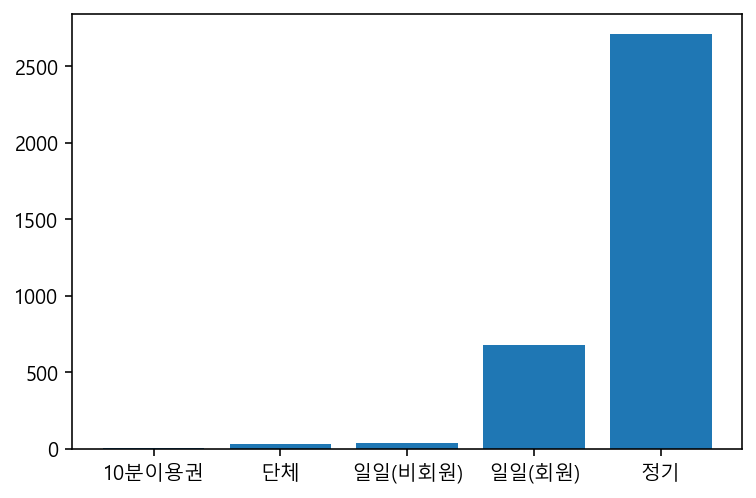

In [39]:
temp = bike.groupby(by = '대여구분', as_index=False)[['이용건수']].sum()

plt.bar(temp['대여구분'], temp['이용건수'] / 1000)
plt.show()

**2) 대여소별 이용 건수 TOP 10**

- 대여소별 이용 건수 TOP 10을 막대 그래프로 시각화.

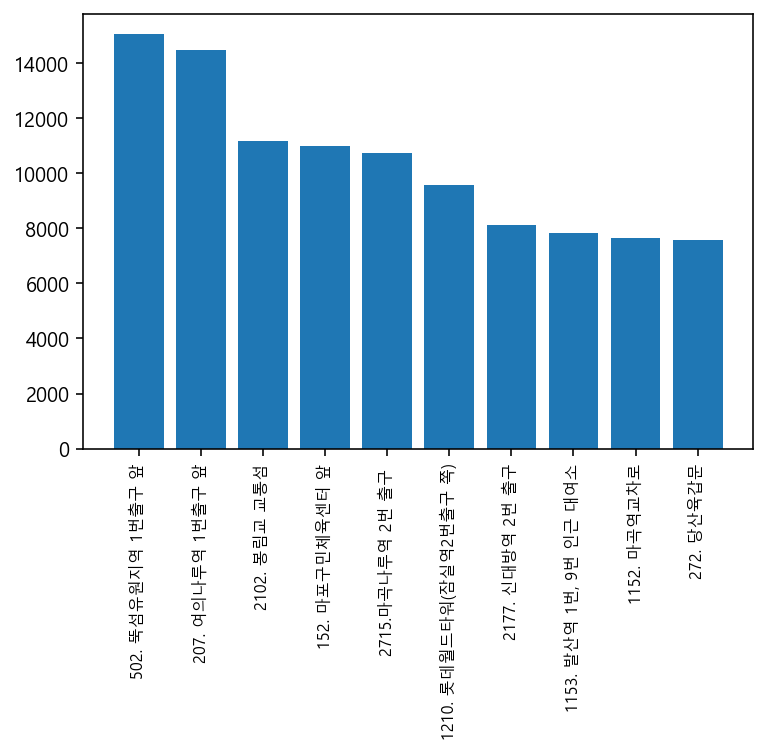

In [45]:
# 대여소별 이용건수 TOP 10
top_10 = bike.groupby(by='대여소', as_index=False)[['이용건수']].sum()
top_10 = top_10.sort_values(by='이용건수', ascending=False).head(10)


plt.bar(top_10['대여소'],top_10['이용건수'])
plt.xticks(rotation=90, fontsize=8)
plt.show()

**3) (옵션) 연령대별 이용 건수**

- 연령대별 이용 건수를 막대 그래프로 시각화

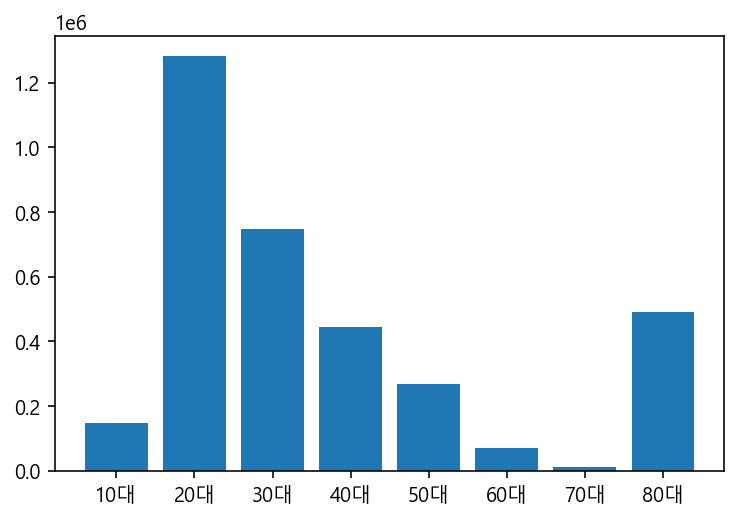

In [47]:
age = bike.groupby(by='연령대', as_index=False)[['이용건수']].sum()

plt.bar(age['연령대'], age['이용건수'])
plt.show()

**4) (옵션) 성별별 이용 건수**

- 성별별 이용 건수를 막대 그래프로 시각화

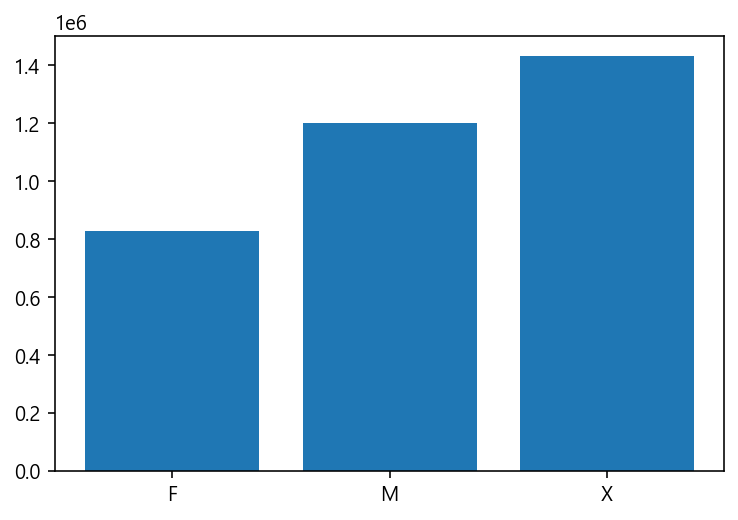

In [48]:
gender = bike.groupby(by='성별', as_index=False)[['이용건수']].sum()

plt.bar(gender['성별'], gender['이용건수'])
plt.show()